<a href="https://colab.research.google.com/github/moni-sarah/-GitHub-Actions/blob/main/Appliquer_'apprentissage_par_transfert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Guide étape par étape pour appliquer l'apprentissage par transfert**



Étape 1 : charger et préparer un ensemble de données.



Étape 2 : Examiner un modèle pré-entraîné.

Étape 3 : Affiner le modèle.

Étape 4 : Évaluer le modèle.

Étape 5 : Comparer à un modèle de référence.

**Étape 1 : Charger et préparer l’ensemble de données**
Pour commencer, nous utiliserons le jeu de données CIFAR-10 , largement utilisé en vision par ordinateur. CIFAR-10 se compose de 60 000 images RVB 32x32 réparties uniformément en 10 classes distinctes. Ces classes représentent des objets du quotidien, des animaux et des véhicules :

Avion

Automobile

Oiseau

Chat

Cerf

Chien

Grenouille

Cheval

Bateau

Camion

Chaque image est étiquetée avec l'une de ces classes, fournissant ainsi un ensemble de données diversifié pour évaluer les performances de classification du modèle. L'ensemble de données sera divisé en trois sous-ensembles pour un entraînement, une validation et des tests efficaces. Cette division garantit la bonne généralisation du modèle aux données non visualisées, et la validation permet d'affiner les hyperparamètres.

Nous prétraiterons l'ensemble de données pour normaliser les valeurs des pixels (en les mettant à l'échelle entre 0 et 1) et convertirons les étiquettes dans un format encodé one-hot adapté aux tâches de classification. Enfin, nous créerons un ensemble de validation en divisant une partie des données d'entraînement, garantissant ainsi une évaluation correcte pendant l'entraînement.

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoded format
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Display dataset information
print(f"Training samples: {x_train.shape[0]}, Validation samples: {x_val.shape[0]}, Test samples: {x_test.shape[0]}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training samples: 40000, Validation samples: 10000, Test samples: 10000


**Étape 2 : Examiner un modèle pré-entraîné**



**L'apprentissage par transfert s'appuie sur des modèles pré-entraînés** tels que MobileNetV2. L'analyse de l'architecture du modèle permet de comprendre ses couches et de visualiser les fonctionnalités apprises lors du pré-entraînement.

/tmp/ipython-input-110525043.py:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 16, 16,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 16, 16,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 16, 16,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 16, 16,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 16, 16,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 16, 16,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 16, 16,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 16, 16,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 16, 16,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 16, 16,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 16, 16,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 17, 17,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 8, 8, 96)  │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 8, 8, 96)  │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 8, 8, 96)  │          0 │ block_1_depthwis… │
│ (ReLU)              │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 8, 8, 24)  │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

First layer with weights: Conv1


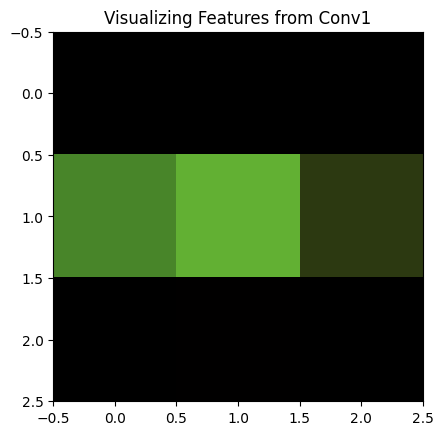

In [ ]:
from tensorflow.keras.applications import MobileNetV2
import matplotlib.pyplot as plt

# Load the MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Display model architecture
base_model.summary()

# Inspect layers and find the first layer with weights
layer_with_weights = None
for layer in base_model.layers:
    if layer.get_weights():
        layer_with_weights = layer
        break

if layer_with_weights:
    print(f"First layer with weights: {layer_with_weights.name}")
    weights = layer_with_weights.get_weights()[0]
    if weights.ndim == 4:  # Check if weights are compatible for visualization
        plt.imshow(weights[:, :, :, 0], cmap='viridis')
        plt.title(f'Visualizing Features from {layer_with_weights.name}')
        plt.show()
    else:
        print(f"Cannot visualize weights from layer {layer_with_weights.name}: incompatible dimensions.")
else:
    print("No layers with weights found in the model.")

**Étape 3 : Affiner le modèle**

In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

# Freeze the base layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers
x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
output = Dense(10, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output)

# Compile and train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=32)

# Print final validation accuracy
val_accuracy = history.history['val_accuracy'][-1]
print(f"Final Validation Accuracy: {val_accuracy:.2f}")

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 54s 39ms/step - accuracy: 0.2041 - loss: 2.1543 - val_accuracy: 0.3018 - val_loss: 1.9609
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 38ms/step - accuracy: 0.2449 - loss: 2.0406 - val_accuracy: 0.3156 - val_loss: 1.9278
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 79s 35ms/step - accuracy: 0.2625 - loss: 2.0178 - val_accuracy: 0.3134 - val_loss: 1.9132
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 47s 38ms/step - accuracy: 0.2606 - loss: 2.0008 - val_accuracy: 0.3167 - val_loss: 1.9038
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.2680 - loss: 1.9971 - val_accuracy: 0.3245 - val_loss: 1.8896
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 35ms/step - accuracy: 0.2682 - loss: 1.9901 - val_accuracy: 0.3246 - val_loss: 1.8828
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - accuracy: 0.2737 - loss: 1.9877 - val_accuracy: 0.3248 - val_loss: 1.8796
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 48s 38ms/step - accuracy: 0.2794 -

**Étape 4 : Évaluer le modèle**

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Analyze feature maps from an intermediate layer
from tensorflow.keras.models import Model
intermediate_layer_model = Model(inputs=model.input, outputs=base_model.get_layer('block_1_expand_relu').output)
intermediate_output = intermediate_layer_model.predict(x_test[:5])

# Display feature map dimensions
print(f"Feature maps for the first test sample have shape: {intermediate_output[0].shape}")

313/313 - 10s - 33ms/step - accuracy: 0.3285 - loss: 1.8663
Test Accuracy: 0.33
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
Feature maps for the first test sample have shape: (16, 16, 96)


**Étape 5 : Comparer à un modèle de référence**
Pour comprendre la valeur de l’apprentissage par transfert, nous allons former un CNN simple à partir de zéro et comparer ses performances au modèle affiné.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

# Define a baseline model
baseline_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile and train the baseline model
baseline_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
baseline_history = baseline_model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=32)

# Evaluate the baseline model
baseline_loss, baseline_accuracy = baseline_model.evaluate(x_test, y_test, verbose=2)
print(f"Baseline Model Test Accuracy: {baseline_accuracy:.2f}")

# Summarize comparison
print(f"Transfer Learning Test Accuracy: {test_accuracy:.2f}")
print(f"Baseline Model Test Accuracy: {baseline_accuracy:.2f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 28ms/step - accuracy: 0.3982 - loss: 1.6870 - val_accuracy: 0.5566 - val_loss: 1.2738
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 27ms/step - accuracy: 0.5807 - loss: 1.2012 - val_accuracy: 0.5954 - val_loss: 1.1640
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - accuracy: 0.6311 - loss: 1.0538 - val_accuracy: 0.6154 - val_loss: 1.1058
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - accuracy: 0.6677 - loss: 0.9486 - val_accuracy: 0.6329 - val_loss: 1.0580
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 27ms/step - accuracy: 0.7001 - loss: 0.8670 - val_accuracy: 0.6440 - val_loss: 1.0602
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.7321 - loss: 0.7759 - val_accuracy: 0.6417 - val_loss: 1.0499
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.7573 - loss: 0.7020 - val_accuracy: 0.6451 - val_loss: 1.0598
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.7774 -

**Étape 6 : Visualisez et réfléchissez**

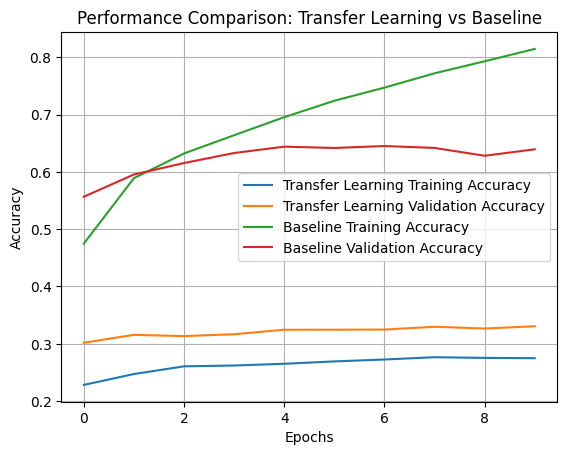

In [ ]:
# Compare training and validation accuracy
plt.plot(history.history['accuracy'], label='Transfer Learning Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Transfer Learning Validation Accuracy')
plt.plot(baseline_history.history['accuracy'], label='Baseline Training Accuracy')
plt.plot(baseline_history.history['val_accuracy'], label='Baseline Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Performance Comparison: Transfer Learning vs Baseline')
plt.grid(True)  # Add grid for clarity
plt.show()

Observations et interprétations attendues

**Modèle d'apprentissage par transfert :**

Observation : convergence plus rapide et précision de validation plus élevée par rapport au modèle de base.

Interprétation : l’apprentissage par transfert accélère la formation et améliore la généralisation, en particulier avec des données limitées.

**Modèle de référence :**

Observation : convergence plus lente et précision globale plus faible.

Interprétation : entraîner un modèle à partir de zéro nécessite beaucoup plus de données et de temps pour obtenir des résultats comparables.

**Validation vs. précision de la formation :**

Observation : le modèle d'apprentissage par transfert montre un écart plus faible entre la précision de la formation et de la validation.

Interprétation : cela indique un surajustement réduit, car les modèles pré-entraînés disposent de connaissances préalables qui les aident à mieux généraliser.